### K-Means

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 5)

import warnings
warnings.simplefilter('ignore')
from sklearn.decomposition import PCA

from kneed import KneeLocator
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [2]:
#loading the preprocessed database.
#Loading the dataset
df=pd.read_csv('delays_prep.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df = df.sample(frac =.2).reset_index()
df=df.drop(['index','Unnamed: 0'], axis=1)
df.head()

,Month,DayOfWeek,DepTime,ArrTime,UniqueCarrier,CRSElapsedTime,Origin,Dest,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay
0,0.054128,0.148569,0.50,0.75,0.098590,0.535714,0.010537,0.036880,0.295295,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.106046,0.135211,0.50,0.75,0.098590,-0.535714,0.064146,0.010102,0.616617,0.000000,0.964464,0.831832,0.0,0.721221,0.685185
2,0.054128,0.135968,0.75,0.75,0.072226,-0.380952,0.064146,0.010506,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.103796,0.148704,0.25,0.25,0.051089,0.202381,0.001691,0.013929,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.103796,0.135968,1.00,1.00,0.035179,0.023810,0.028407,0.000529,0.295295,0.896897,0.000000,0.000000,0.0,0.000000,0.606607


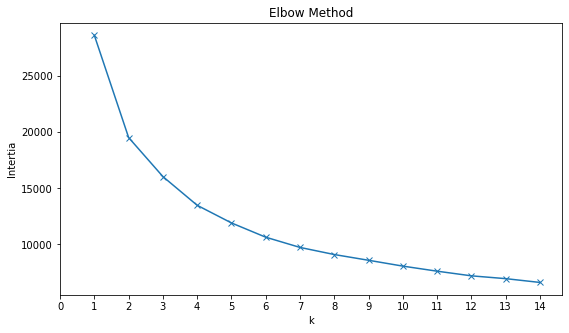

In [3]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [4]:
colze = KneeLocator(range(1, 15), intertia, curve="convex", direction="decreasing")
print('Ideal cluster number is:', colze.elbow)

Ideal cluster number is: 4


##### Implementing K-means Algorithm

In [5]:
# Perform K-means algorithm

km = KMeans(n_clusters=4,random_state = 42, n_init= km.n_iter_, init='random')
kfit=km.fit(df)
y_kmeans = km.predict(df)

centroids = km.cluster_centers_
C = km.cluster_centers_


In [6]:
#Appending the identified clusters to the original data

pca = PCA(n_components=2)
ppcc=pca.fit_transform(df)

principalDf = pd.DataFrame(data = ppcc, columns = ['component1', 'component2'])

principalDf['Cluster'] = y_kmeans
principalDf.head()


,component1,component2,Cluster
0,0.344911,-0.577192,0
1,-0.776709,0.573104,1
2,-0.564503,-0.741651,0
3,0.007863,-0.820624,0
4,-0.180503,0.030181,2


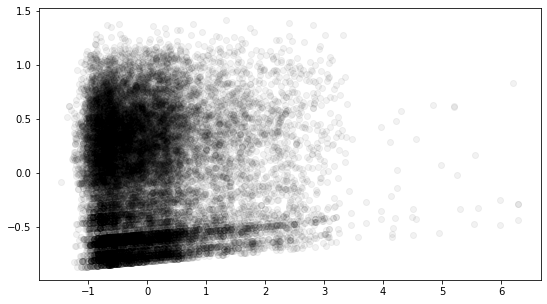

In [7]:
plt.scatter(principalDf['component1'], principalDf['component2'], alpha=.05, color='black')

##### Plotting our Clusters and Centroids

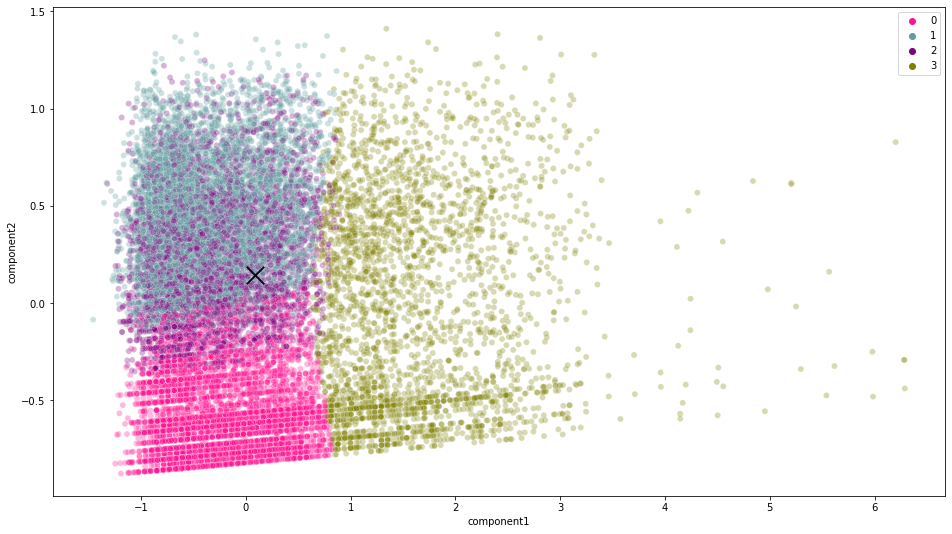

In [8]:
plt.rcParams['figure.figsize'] = (16, 9)

# Predicting the clusters
labels = km.predict(df)

colores=['deeppink','cadetblue','purple','olive']
#,'deeppink','sienna','tomato','darkcyan','cadetblue','purple','olive'
asignar=[]
for row in labels:
    asignar.append(colores[row])

sns.scatterplot(data=principalDf, x="component1", y="component2", hue= y_kmeans, palette = colores, alpha = 0.3)
centers = km.cluster_centers_# Plot centers

plt.scatter(centers[:, 0], centers[:, 1],color='k', s=300, marker="x", alpha = 0.5);


In [9]:
from sklearn import metrics
labels = km.labels_
sil=metrics.silhouette_score(df, labels, metric = 'euclidean')
if sil < 0:
    print('silhouette:',round(sil,4),'-- sample2 have been assigned to the wrong cluster')
elif sil < 0.5:
    print('silhouette:',round(sil,4),'-- overlaping samples')
else:
    print('silhouette:',round(sil,4),'-- good clustering')

silhouette: 0.291 -- overlaping samples


In [10]:
#CH score
print ('CH Score:',metrics.calinski_harabasz_score(df, labels))

CH Score: 7220.4360430134


In [19]:
#silhouette Score with 5 clusters seems to be better

# Perform K-means algorithm

km = KMeans(n_clusters=5,random_state = 42, n_init= km.n_iter_, init='random')
kfit=km.fit(df)
y_kmeans = km.predict(df)

labels = km.labels_
print(metrics.silhouette_score(df, labels, metric = 'euclidean'))


0.311186834862462


<br><br><br>

### AgglomerativeClustering

In [11]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(df)
labels = model.labels_

In [12]:
labels

array([2, 0, 2, ..., 2, 0, 2])

In [13]:
#Appending the identified clusters to the original data

pca = PCA(n_components=2)
ppcc=pca.fit_transform(df)

aggdf = pd.DataFrame(data = ppcc, columns = ['component1', 'component2'])

aggdf['Cluster'] = labels
aggdf.head()

,component1,component2,Cluster
0,0.344911,-0.577192,2
1,-0.776709,0.573104,0
2,-0.564503,-0.741651,2
3,0.007863,-0.820624,2
4,-0.180503,0.030181,3


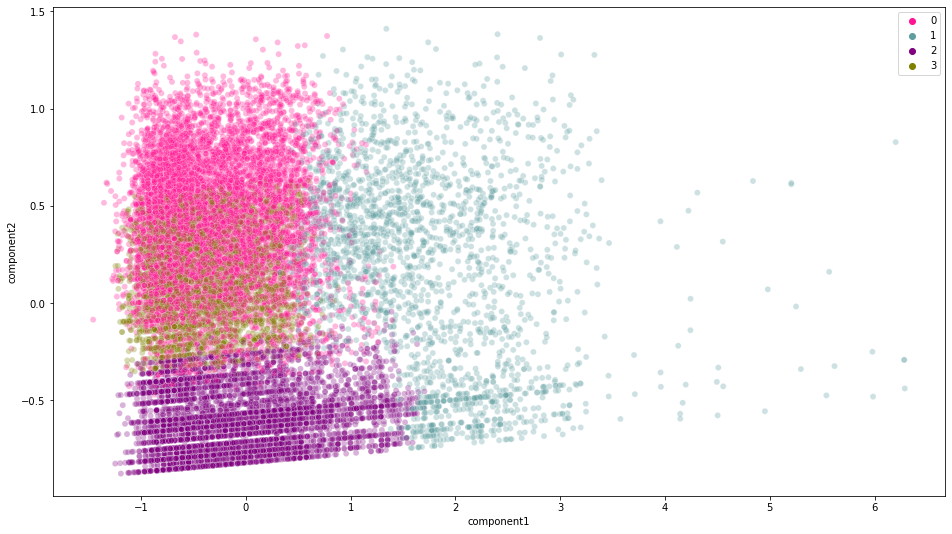

In [14]:
plt.rcParams['figure.figsize'] = (16, 9)


colores=['deeppink','cadetblue','purple','olive']
#,'deeppink','sienna','tomato','darkcyan','cadetblue','purple','olive'
asignar=[]
for row in labels:
    asignar.append(colores[row])

sns.scatterplot(data=aggdf, x="component1", y="component2", hue= labels, palette = colores, alpha = 0.3)


In [15]:
sil=metrics.silhouette_score(df, labels, metric = 'euclidean')
if sil < 0:
    print('silhouette:',round(sil,4),'-- samplea have been assigned to the wrong cluster')
elif sil < 0.5:
    print('silhouette:',round(sil,4),'-- overlaping samples')
else:
    print('silhouette:',round(sil,4),'-- good clustering')

silhouette: 0.2375 -- overlaping samples
